## ***Data Preprocessing***

In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt

In [183]:
data = pd.read_csv('../data/ayurvedic_products_1.csv')
data

,Product_ID,Product_Name,Form,Ashwagandha,Triphala,Amalaki,Haritaki,Bibhitaki,Neem,Tulsi,...,KaunchBeej,Palash,Agarwood,Chitrak,Proportion_Others,Price,Dosage(g),Shelf_Life(months),Preparation_Method,Speciality
0,P0001,Product_1,Decoction,0.02,0.01,0.04,0.00,0.00,0.01,0.01,...,0.00,0.00,0.02,0.00,0.13,679,0.44,12,Fermentation,Weight Loss
1,P0002,Product_2,Tablet,0.02,0.02,0.02,0.02,0.01,0.01,0.03,...,0.03,0.01,0.01,0.01,0.12,679,0.27,36,Extract,Weight Loss
2,P0003,Product_3,Decoction,0.00,0.04,0.02,0.02,0.01,0.02,0.02,...,0.01,0.00,0.00,0.04,0.10,958,0.40,36,TabletCompression,Diabetes Management
3,P0004,Product_4,Powder,0.01,0.00,0.01,0.02,0.01,0.03,0.01,...,0.03,0.02,0.00,0.02,0.09,963,0.29,36,PowderBlend,Joint Pain Relief
4,P0005,Product_5,Powder,0.03,0.00,0.03,0.03,0.00,0.01,0.02,...,0.04,0.00,0.00,0.02,0.08,551,0.51,24,Decoction,Cardiac Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,Product_996,Powder,0.03,0.03,0.02,0.03,0.03,0.01,0.02,...,0.01,0.03,0.01,0.01,0.10,524,0.27,36,Extract,Joint Pain Relief
996,P0997,Product_997,Capsule,0.02,0.01,0.01,0.03,0.04,0.03,0.03,...,0.01,0.02,0.03,0.00,0.06,107,0.51,36,Fermentation,Kidney Care
997,P0998,Product_998,Paste,0.02,0.02,0.03,0.02,0.00,0.00,0.03,...,0.02,0.02,0.02,0.00,0.12,775,0.54,18,Extract,Respiratory Health
998,P0999,Product_999,Tablet,0.02,0.00,0.01,0.03,0.02,0.03,0.01,...,0.01,0.01,0.02,0.03,0.08,761,0.56,18,PowderBlend,Skin Disorders


In [184]:
# Frequently used functions
def map_txts (data):
    data["Form"].replace(
        ['Decoction', 'Tablet', 'Powder', 'Paste', 'Syrup', 'Capsule'], 
        [0, 1, 2, 3, 4, 5], 
        inplace=True
    )
    data["Preparation_Method"].replace(
        ['Fermentation', 'Extract', 'TabletCompression', 'PowderBlend','Decoction'], 
        [0, 1, 2, 3, 4], 
        inplace=True
    )

def split_dataset (data):
    splitter = StratifiedShuffleSplit(test_size=0.2, random_state=42)
    for train_idx, test_idx in splitter.split(data, data["Speciality"]):
        train_data = data.iloc[train_idx]
        test_data = data.iloc[test_idx]

    return train_data, test_data
    

In [185]:
# Clearing dataset
data.drop(['Product_ID', 'Product_Name'], axis=1, inplace=True)

In [186]:
map_txts(data)

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_16776\1472913152.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Form"].replace(
C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_16776\1472913152.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Form"].replace(
C:\Users\SOUMYOJEET\

In [187]:
data["Speciality"].unique(), data["Speciality"].nunique()

(array(['Weight Loss', 'Diabetes Management', 'Joint Pain Relief',
        'Cardiac Health', 'Immunity Booster', 'Respiratory Health',
        'Memory & Cognition', 'Stress & Anxiety', 'Digestive Cleanser',
        "Women's Health", 'Kidney Care', 'Hair & Scalp Care',
        'Skin Disorders', 'Liver Detox', 'Anti-Inflammatory'], dtype=object),
 15)

In [188]:
data["Speciality"].describe()

count                    1000
unique                     15
top       Diabetes Management
freq                       88
Name: Speciality, dtype: object

In [189]:
data["Speciality"].value_counts()

Speciality
Diabetes Management    88
Hair & Scalp Care      83
Immunity Booster       82
Cardiac Health         72
Memory & Cognition     70
Stress & Anxiety       67
Weight Loss            67
Respiratory Health     65
Joint Pain Relief      65
Skin Disorders         65
Kidney Care            65
Liver Detox            54
Digestive Cleanser     54
Anti-Inflammatory      52
Women's Health         51
Name: count, dtype: int64

In [190]:
data["Form"].value_counts()

Form
3    183
1    167
0    166
4    166
5    161
2    157
Name: count, dtype: int64

In [191]:
data["Preparation_Method"].value_counts()

Preparation_Method
3    210
2    204
0    201
1    199
4    186
Name: count, dtype: int64

> *From above analysis we can say that the dataset has to be stratifiedly splited to train and test on the basis of the "Speciality" feild*

In [192]:
train_data, test_data = split_dataset(data)
train_data.shape, test_data.shape

((800, 57), (200, 57))

In [193]:
train_data

,Form,Ashwagandha,Triphala,Amalaki,Haritaki,Bibhitaki,Neem,Tulsi,Brahmi,Shankhpushpi,...,KaunchBeej,Palash,Agarwood,Chitrak,Proportion_Others,Price,Dosage(g),Shelf_Life(months),Preparation_Method,Speciality
76,1,0.02,0.03,0.01,0.01,0.00,0.04,0.03,0.01,0.02,...,0.02,0.02,0.00,0.00,0.10,197,0.47,24,0,Respiratory Health
634,4,0.02,0.03,0.02,0.03,0.01,0.03,0.01,0.01,0.02,...,0.03,0.01,0.02,0.01,0.13,895,0.29,24,4,Kidney Care
392,0,0.02,0.01,0.01,0.02,0.03,0.02,0.01,0.02,0.00,...,0.03,0.01,0.02,0.03,0.11,914,0.59,12,2,Memory & Cognition
765,2,0.02,0.00,0.01,0.04,0.00,0.01,0.04,0.01,0.01,...,0.02,0.04,0.02,0.00,0.09,885,0.59,18,0,Stress & Anxiety
859,0,0.02,0.02,0.01,0.01,0.01,0.02,0.02,0.01,0.00,...,0.01,0.01,0.02,0.02,0.12,354,0.28,18,3,Kidney Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,0,0.01,0.03,0.03,0.00,0.02,0.03,0.02,0.01,0.03,...,0.02,0.02,0.02,0.02,0.13,264,0.58,18,3,Skin Disorders
755,3,0.01,0.02,0.00,0.03,0.03,0.03,0.02,0.01,0.03,...,0.03,0.01,0.00,0.03,0.11,807,0.44,36,2,Women's Health
398,0,0.01,0.03,0.02,0.03,0.00,0.03,0.01,0.03,0.01,...,0.02,0.01,0.01,0.01,0.12,115,0.49,18,3,Joint Pain Relief
678,3,0.03,0.02,0.03,0.02,0.01,0.02,0.00,0.00,0.03,...,0.02,0.02,0.01,0.01,0.12,885,0.36,36,0,Memory & Cognition


In [194]:
train_data["Speciality"].value_counts()

Speciality
Diabetes Management    70
Immunity Booster       66
Hair & Scalp Care      66
Cardiac Health         57
Memory & Cognition     56
Stress & Anxiety       54
Weight Loss            54
Joint Pain Relief      52
Kidney Care            52
Respiratory Health     52
Skin Disorders         52
Digestive Cleanser     43
Liver Detox            43
Anti-Inflammatory      42
Women's Health         41
Name: count, dtype: int64

In [195]:
test_data["Speciality"].value_counts()

Speciality
Diabetes Management    18
Hair & Scalp Care      17
Immunity Booster       16
Cardiac Health         15
Memory & Cognition     14
Stress & Anxiety       13
Weight Loss            13
Respiratory Health     13
Skin Disorders         13
Joint Pain Relief      13
Kidney Care            13
Digestive Cleanser     11
Liver Detox            11
Anti-Inflammatory      10
Women's Health         10
Name: count, dtype: int64

In [196]:
# separating labels and data
train_labels = train_data["Speciality"].copy()
test_labels = test_data["Speciality"].copy()

train_data.drop(["Speciality"], axis=1, inplace=True)
test_data.drop(["Speciality"], axis=1, inplace=True)
train_labels

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_16776\2715635067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(["Speciality"], axis=1, inplace=True)
C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_16776\2715635067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(["Speciality"], axis=1, inplace=True)


76     Respiratory Health
634           Kidney Care
392    Memory & Cognition
765      Stress & Anxiety
859           Kidney Care
              ...        
922        Skin Disorders
755        Women's Health
398     Joint Pain Relief
678    Memory & Cognition
378     Hair & Scalp Care
Name: Speciality, Length: 800, dtype: object

In [197]:
test_data.columns, train_data.columns

(Index(['Form', 'Ashwagandha', 'Triphala', 'Amalaki', 'Haritaki', 'Bibhitaki',
        'Neem', 'Tulsi', 'Brahmi', 'Shankhpushpi', 'Turmeric', 'Ginger',
        'Garlic', 'Clove', 'Cardamom', 'Cinnamon', 'Pepper', 'Licorice',
        'Guduchi', 'Shatavari', 'AloeVera', 'Moringa', 'Fenugreek', 'Cumin',
        'Coriander', 'Mustard', 'Saffron', 'Nutmeg', 'Fennel', 'Camphor',
        'Jatamansi', 'Kesar', 'Pippali', 'Punarnava', 'Arjuna', 'Guggulu',
        'Manjistha', 'Kalonji', 'Baheda', 'Giloy', 'Daruharidra', 'Vidanga',
        'Hibiscus', 'AmlaOil', 'Ashoka', 'Bhringraj', 'SafedMusli',
        'KaunchBeej', 'Palash', 'Agarwood', 'Chitrak', 'Proportion_Others',
        'Price', 'Dosage(g)', 'Shelf_Life(months)', 'Preparation_Method'],
       dtype='object'),
 Index(['Form', 'Ashwagandha', 'Triphala', 'Amalaki', 'Haritaki', 'Bibhitaki',
        'Neem', 'Tulsi', 'Brahmi', 'Shankhpushpi', 'Turmeric', 'Ginger',
        'Garlic', 'Clove', 'Cardamom', 'Cinnamon', 'Pepper', 'Licorice',
    

## ***Speciality of the product prediction (KNN Classification)***

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score

In [213]:
# frequently used functions

def visualise_test_train_score(ks, train_scores, test_scores):
    plt.plot(ks, train_scores, marker='*', c='g')
    plt.plot(ks, test_scores, marker='o', c= 'r')
    plt.ylabel("Scores")
    plt.xlabel("K")
    plt.title("Elbow detection for best K")
    plt.show()

def predict_classes (pred_proba, classes):
    pred_proba = pred_proba.flatten()
    sorted_indx = np.argsort(pred_proba)[::-1]
    sorted_pred_proba = pred_proba[sorted_indx]
    probs_labels = [list(classes)[id] for id in sorted_indx if pred_proba[id] > 0]
    return probs_labels


In [200]:
# finding best k
train_scores = []
test_scores = []
ks = []

for k in range (2, 20):
    temp_clf = KNeighborsClassifier(n_neighbors=k).fit(train_data, train_labels)
    train_scores.append(temp_clf.score(train_data, train_labels))
    test_scores.append(temp_clf.score(test_data, test_labels))
    ks.append(k)

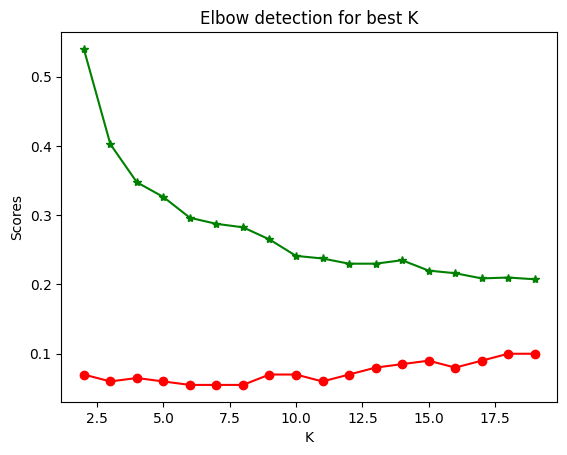

In [201]:
visualise_test_train_score(ks, train_scores, test_scores)

In [202]:
# Cross validation scoring
cross_scores = []
ks = []

for k in range(2, 20):
    # initiating a k nn model
    clf = KNeighborsClassifier(n_neighbors=k)

    
    cvs = cross_val_score(clf, train_data, train_labels, cv=5)
    cross_scores.append(cvs.mean())
    
    # storing corressponding ks
    ks.append(k)

In [203]:
cross_scores

[np.float64(0.09),
 np.float64(0.08249999999999999),
 np.float64(0.075),
 np.float64(0.08625000000000001),
 np.float64(0.08499999999999999),
 np.float64(0.09125000000000001),
 np.float64(0.1),
 np.float64(0.10124999999999999),
 np.float64(0.095),
 np.float64(0.0925),
 np.float64(0.09624999999999999),
 np.float64(0.07875),
 np.float64(0.07625),
 np.float64(0.08125),
 np.float64(0.08125),
 np.float64(0.08375),
 np.float64(0.08875000000000001),
 np.float64(0.08499999999999999)]

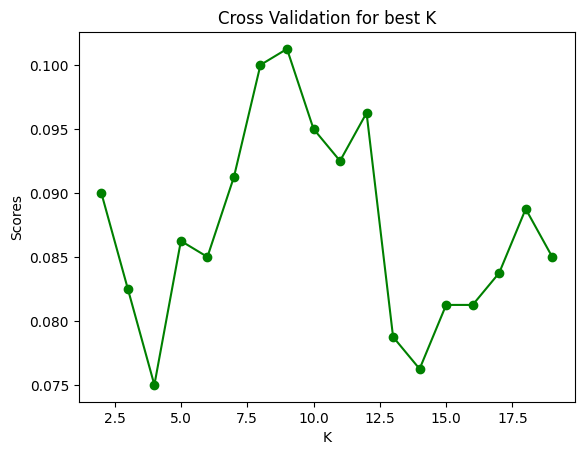

In [204]:
plt.plot(ks, cross_scores, marker='o', c= 'g')
plt.ylabel("Scores")
plt.xlabel("K")
plt.title("Cross Validation for best K")
plt.show()

` From the plots we can conclude 9 is better fit `

In [205]:
clf = KNeighborsClassifier(n_neighbors=9).fit(train_data, train_labels)

In [206]:
clf.classes_

array(['Anti-Inflammatory', 'Cardiac Health', 'Diabetes Management',
       'Digestive Cleanser', 'Hair & Scalp Care', 'Immunity Booster',
       'Joint Pain Relief', 'Kidney Care', 'Liver Detox',
       'Memory & Cognition', 'Respiratory Health', 'Skin Disorders',
       'Stress & Anxiety', 'Weight Loss', "Women's Health"], dtype=object)

In [221]:
predict_probas = clf.predict_proba(test_data.iloc[43:44])
predict_probas

array([[0.        , 0.11111111, 0.11111111, 0.11111111, 0.33333333,
        0.11111111, 0.        , 0.        , 0.        , 0.11111111,
        0.        , 0.        , 0.        , 0.        , 0.11111111]])

In [208]:
preds = clf.predict(test_data.iloc[40:45])
preds

array(['Stress & Anxiety', 'Cardiac Health', 'Hair & Scalp Care',
       'Hair & Scalp Care', 'Memory & Cognition'], dtype=object)

In [209]:
test_labels[40:45]

224    Diabetes Management
946         Women's Health
293         Women's Health
928      Hair & Scalp Care
798            Weight Loss
Name: Speciality, dtype: object

In [222]:
result = predict_classes(predict_probas, clf.classes_)
result

['Hair & Scalp Care',
 'Memory & Cognition',
 "Women's Health",
 'Digestive Cleanser',
 'Diabetes Management',
 'Immunity Booster',
 'Cardiac Health']